In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, make_scorer
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv("secom_lgb.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [20]:
X = df.drop("Pass/Fail", axis=1)
y = df["Pass/Fail"].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify = y)

In [22]:
from sklearn.model_selection import train_test_split

## SMOTE

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)
# train 데이터에서 오버샘플링 시키기
x_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 오버샘플링 적용 후 데이터 레이블 개수 살펴보기
print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', x_train_over.shape, y_train_over.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_train_over).value_counts())

오버샘플링 전 : (1253, 61) (1253,)

오버샘플링 후 : (2340, 61) (2340,)

오버샘플링 전 레이블 분포 :
 0    1170
1      83
dtype: int64

오버샘플링 후 레이블 분포 :
 1    1170
0    1170
dtype: int64


Class=0, n=1170 (74.665%)
Class=1, n=83 (5.297%)


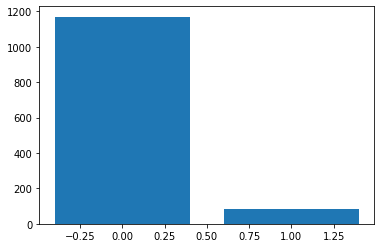

In [24]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
#plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=1170 (74.665%)
Class=1, n=1170 (74.665%)


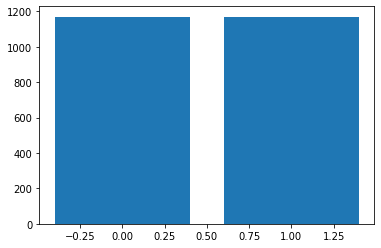

In [25]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train_over)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [26]:
import numpy as np
x_train_over = np.array(x_train_over)
X_test = np.array(X_test)

In [28]:
import lightgbm as lgb
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, make_scorer
from sklearn.model_selection import GridSearchCV


In [29]:
lgb_clf = lgb.LGBMClassifier(num_leaves=31, objective='binary')
lgb_clf.fit(train_x, train_y)

lgbm_wrapper = lgb.LGBMClassifier(n_estimators = 400) 
#LGBM 의 조기 중단 수행 설정
evals = [(test_x, test_y)]
# params 의 dict 형태로 주지 않고, 직접 설정
lgbm_wrapper.fit(train_x,train_y, early_stopping_rounds = 100, eval_metric = 'logless', eval_set= evals , verbose = True)
preds = lgbm_wrapper.predict(test_x)
pred_proba = lgbm_wrapper.predict_proba(test_x)[:,1]
# 약 98.15 의 정확도를 가지는 것을 볼 수 있다.
print(" 정 확 도 : {0:.4f}".format(accuracy_score(test_y,preds)))

[1]	valid_0's binary_logloss: 0.633792
[2]	valid_0's binary_logloss: 0.584825
[3]	valid_0's binary_logloss: 0.545137
[4]	valid_0's binary_logloss: 0.510042
[5]	valid_0's binary_logloss: 0.474922
[6]	valid_0's binary_logloss: 0.447708
[7]	valid_0's binary_logloss: 0.425815
[8]	valid_0's binary_logloss: 0.405635
[9]	valid_0's binary_logloss: 0.383052
[10]	valid_0's binary_logloss: 0.364781
[11]	valid_0's binary_logloss: 0.34635
[12]	valid_0's binary_logloss: 0.329533
[13]	valid_0's binary_logloss: 0.314066
[14]	valid_0's binary_logloss: 0.300271
[15]	valid_0's binary_logloss: 0.290998
[16]	valid_0's binary_logloss: 0.27996
[17]	valid_0's binary_logloss: 0.267297
[18]	valid_0's binary_logloss: 0.258731
[19]	valid_0's binary_logloss: 0.248487
[20]	valid_0's binary_logloss: 0.235109
[21]	valid_0's binary_logloss: 0.228302
[22]	valid_0's binary_logloss: 0.218863
[23]	valid_0's binary_logloss: 0.212865
[24]	valid_0's binary_logloss: 0.205058
[25]	valid_0's binary_logloss: 0.197312
[26]	valid_

[203]	valid_0's binary_logloss: 0.0618916
[204]	valid_0's binary_logloss: 0.0617045
[205]	valid_0's binary_logloss: 0.0616953
[206]	valid_0's binary_logloss: 0.0615744
[207]	valid_0's binary_logloss: 0.061971
[208]	valid_0's binary_logloss: 0.0621896
[209]	valid_0's binary_logloss: 0.0615271
[210]	valid_0's binary_logloss: 0.0613042
[211]	valid_0's binary_logloss: 0.0615599
[212]	valid_0's binary_logloss: 0.060896
[213]	valid_0's binary_logloss: 0.0612084
[214]	valid_0's binary_logloss: 0.060734
[215]	valid_0's binary_logloss: 0.0612486
[216]	valid_0's binary_logloss: 0.0616422
[217]	valid_0's binary_logloss: 0.0610408
[218]	valid_0's binary_logloss: 0.0608853
[219]	valid_0's binary_logloss: 0.0606166
[220]	valid_0's binary_logloss: 0.0609975
[221]	valid_0's binary_logloss: 0.0610926
[222]	valid_0's binary_logloss: 0.0610526
[223]	valid_0's binary_logloss: 0.0610489
[224]	valid_0's binary_logloss: 0.060994
[225]	valid_0's binary_logloss: 0.0608257
[226]	valid_0's binary_logloss: 0.0609

 정 확 도 : 0.9843


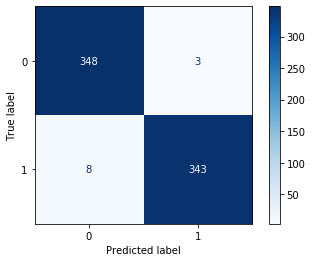

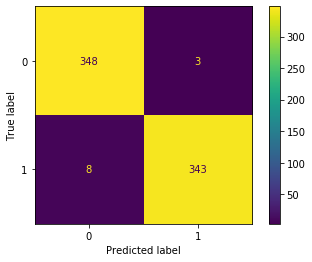

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_y,preds, labels=lgbm_wrapper.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lgbm_wrapper.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score
print('confusion matrix=\n',confusion_matrix(y_true=test_y,y_pred=preds))
print('trainset 정확도: ',lgbm_wrapper.score(train_x,train_y)) #trainset 정확도
print('testset 정확도: ',lgbm_wrapper.score(test_x,test_y)) #testset 정확도
print('accuracy= ',accuracy_score(y_true=test_y,y_pred=preds))
print('precision= ',precision_score(y_true=test_y,y_pred=preds))
print('recall= ',recall_score(y_true=test_y,y_pred=preds))
print('f1 score= ',f1_score(y_true=test_y,y_pred=preds))
print('교차 검증= ',cross_val_score(lgbm_wrapper,x,y).mean())
print(classification_report(test_y,preds))
heat=pd.DataFrame(confusion_matrix(test_y,preds))
sns.heatmap(heat,annot=True)

confusion matrix=
 [[348   3]
 [  8 343]]
trainset 정확도:  1.0
testset 정확도:  0.9843304843304843
accuracy=  0.9843304843304843
precision=  0.9913294797687862
recall=  0.9772079772079773
f1 score=  0.9842180774748924


ValueError: Found input variables with inconsistent numbers of samples: [2340, 1567]